### Title : Customer Churn Prediction for Beta Bank

## Introduction: 

In this project we are going to develop a predictive model to check whether a customer will leave the bank soon based on the data of clients’ past behavior and termination of contracts with the bank. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
Our aims are 
- Build a model with the maximum possible F1 score.(Atleast 0.59)
- Measure the AUC-ROC metric and compare it with the F1

This project consists of following steps
* Data loading and initialization
* Data preprocessing
* Split the source data into a training set, a validation set, and a test set.
* Examine the balance of classes with different models
* Improve the quality models and train different models and find the best model 

### First stage: Data loading and initialization
In this stage, load all the important libraries and load the content of data in csv file

In [46]:
# Import all libraries
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns


In [47]:
# Load the data into a variable df
df=pd.read_csv('/datasets/Churn.csv')
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


The dataframe consists of 10000 rows and 14 columns.  The columns are 
- RowNumber — data string index
- CustomerId — unique customer identifier
- Surname — surname
- CreditScore — credit score
- Geography — country of residence
- Gender — gender
- Age — age
- Tenure — period of maturation for a customer’s fixed deposit (years)
- Balance — account balance
- NumOfProducts — number of banking products used by the customer
- HasCrCard — customer has a credit card
- IsActiveMember — customer’s activeness
- EstimatedSalary — estimated salary
- Exited — сustomer has left

### Second Stage: Data preprocessing

In this stage, check whether there are any duplicates in the data. Also check if there is any missing values and check the data types are appropriate for each column.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


The above information shows the non null count in each column and the datatypes. The dtypes are appropriate for further analysis.

In [49]:
# Convert the name of columns into appropriate form
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', column).lower().replace(' ', '_') for column in df.columns]
print(df.columns)

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')


In [50]:
#Check for missing values
df.isnull().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [51]:
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

From the above data, it is clear that the number of counts in extreme ends are less compared to others, i.e,it is not affected by extreme values. So we can choose median value to replace the missing values.

In [52]:
#Fill missing value with the median
df['tenure'].fillna(df['tenure'].median(), inplace=True)

In [53]:
#Recheck for missing values
df.isnull().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [54]:
#Check for duplicates
df.duplicated().sum()

0

In [55]:
#Drop the colums containing personal details
df=df.drop(columns=['row_number', 'customer_id','surname'])

In [56]:
#Check for duplicates
df.duplicated().sum()

0

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Good! Deleting columns may introduce new duplicates, so it's better to look for the duplicates after we delete columns :) 
    
</div>

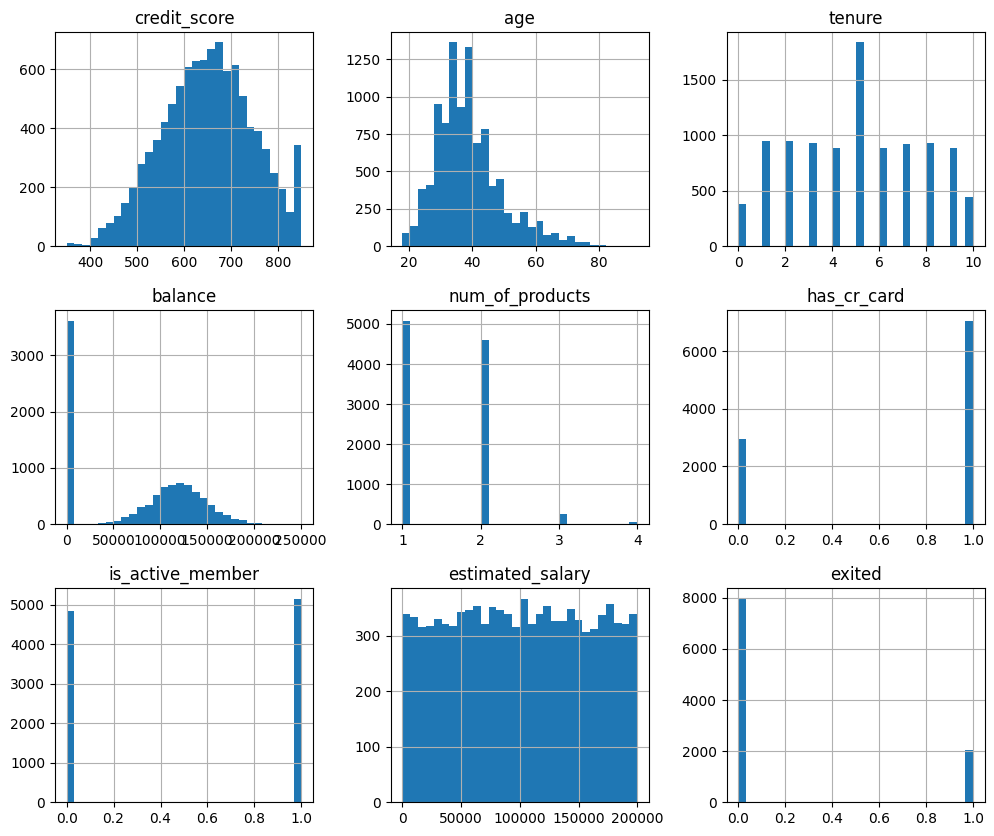

In [57]:
# Histogram to show the distribution of numerical features
df.hist(figsize=(12,10),bins=30)
plt.show()

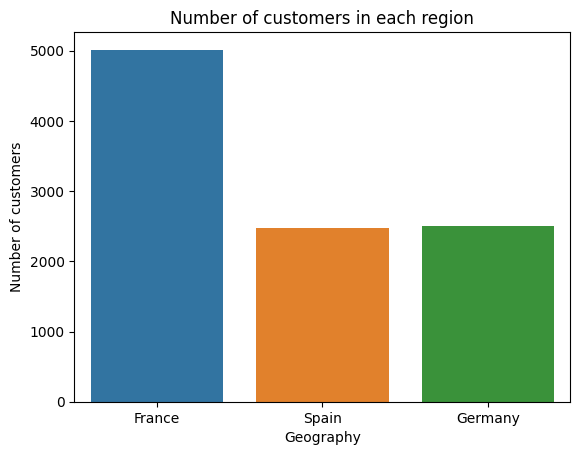

In [58]:
#Bar plot to show the customers in each region
sns.countplot(data=df, x='geography')
plt.xlabel('Geography')
plt.ylabel('Number of customers')
plt.title('Number of customers in each region')
plt.show()

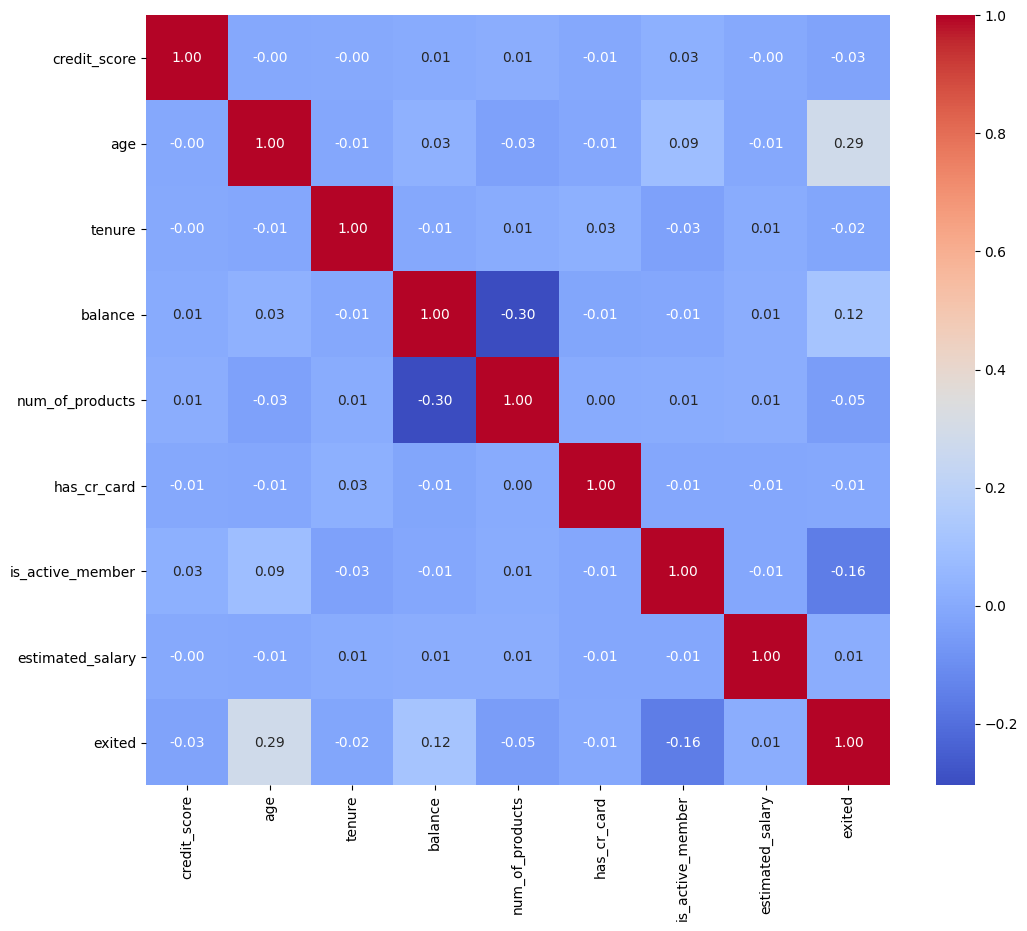

In [59]:
#Corelation heatmap displays corelation between quantitative features:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

The above figures shows the distribution of numerical features, heatmap and categorical feature geography. The distribution of numerical features like age, salary, credit score etc are shown in the figure. Number of customers in France is higher than Spain and Germany.The heatmap visually represents the relationships between variables in the df, making it easy to identify potential dependencies or correlations.

In [60]:
#Convert categorical variables into numerical data
data=pd.get_dummies(df, drop_first=True)

Encode the categorical variables like geography, gender into numerical form using pd.get_dummies() before splitting the data.

In [61]:
# Features and target
features = data.drop(columns=['exited'])
target = data['exited']

### Third Stage: Split the source data into a training set, a validation set, and a test set.

In this stage, the source data is divided into 3:1:1 ratio. i.e, Source data is divided into training dataset, validating dataset and testdataset. 60% of source data is training set, 20% for validating set and remaining 20% for test set.

In [62]:
# Splitting the data into two
data_train, data_remaining =train_test_split(data, test_size=0.40, random_state=12345, stratify=data['exited'])

In [63]:
# Split the data into validating and test set
data_valid, data_test=train_test_split(data_remaining, test_size=0.50, random_state=12345, stratify=data_remaining['exited'])

Split the data into three parts: training set (to train the model), validation set (to tune hyperparameters and select the best model), and test set (to evaluate the final model's performance). 60% of total data considers as training data and remaining 40% as validation and test sets.

In [64]:
# Split the data into 3 sets
features_train=data_train.drop(columns=['exited'])
target_train = data_train['exited']
features_valid=data_valid.drop(columns=['exited'])
target_valid = data_valid['exited']
features_test=data_test.drop(columns=['exited'])
target_test = data_test['exited']

In [65]:
print(f'The training set shape is {features_train.shape} for features and {target_train.shape} for targets')
print(f'The validation set shape is {features_valid.shape} for features and {target_valid.shape} for targets')
print(f'The test set shape is {features_test.shape} for features and {target_test.shape} for targets')

The training set shape is (6000, 11) for features and (6000,) for targets
The validation set shape is (2000, 11) for features and (2000,) for targets
The test set shape is (2000, 11) for features and (2000,) for targets


In this stage split the data into three sets training, validating and test sets in 3:1:1 ratio.

### Fourth Stage: Examine the balance of classes with different models

In this stage compare different classification models like

- DecisionTreeClassifier
- RandomForestClassifier
- Linear Regression
Examine the balances of classes with different models

In [66]:
#Modelling using DecisionTreeClassifier
# Tune the hyperparameters using gridsearch
param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=12345),param_grid = param_grid, cv = 2, scoring='f1')

In [67]:
grid_search.fit(features_train,target_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [68]:
#Train the model using best parameters
best_params1 = grid_search.best_params_
best_model_0 = DecisionTreeClassifier(**best_params1, random_state=12345)
best_model_0.fit(features_train, target_train)
best_model_0.fit(features_valid, target_valid)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5,
                       random_state=12345)

In [69]:
#Predict valid features
valid_predictions=best_model_0.predict(features_valid)

In [70]:
print(confusion_matrix(target_valid, valid_predictions))

[[1545   47]
 [ 229  179]]


In [71]:
print(f1_score(target_valid, valid_predictions))

0.5646687697160884


In [72]:
# Modelling using LogisticRegression
# Tune the hyperparameters using gridsearch
param_grid = [
    {'penalty':['l1','l2'],
    'C' : np.logspace(-4,4,20),
    'solver': ['liblinear']
    
}
]
grid_search= GridSearchCV(estimator=LogisticRegression(random_state=12345),param_grid = param_grid, cv = 5, scoring='f1')

In [73]:
grid_search.fit(features_train,target_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=12345),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             scoring='f1')

In [74]:
#Train the model using best parameters
best_params2 =grid_search.best_params_
best_model_1 = LogisticRegression(**best_params2, random_state=12345)
best_model_1.fit(features_train, target_train)
best_model_1.fit(features_valid, target_valid)

LogisticRegression(C=4.281332398719396, penalty='l1', random_state=12345,
                   solver='liblinear')

In [75]:
#Predict test features
valid_predictions=best_model_1.predict(features_valid)

In [76]:
print(confusion_matrix(target_valid, valid_predictions))

[[1516   76]
 [ 310   98]]


In [77]:
print(f1_score(target_valid, valid_predictions))

0.3367697594501718


In [78]:
# Modelling using RandomForestClassifier
# Tune the hyperparameters using gridsearch

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=12345),
    param_grid=param_grid,
    cv=3,  
    n_jobs=-1, 
    verbose=2,
    scoring='f1'
)

In [79]:
grid_search.fit(features_train,target_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total t

[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, min_s

[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samp

[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_s

[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=1

[CV] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=20, 

[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=30, m

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1', verbose=2)

In [80]:
#Train the model using best parameters
best_params = grid_search.best_params_
best_model_2 = RandomForestClassifier(**best_params, random_state=12345)
best_model_2.fit(features_train, target_train)
best_model_2.fit(features_valid, target_valid)

RandomForestClassifier(max_depth=20, min_samples_split=10, random_state=12345)

In [81]:
#Predict valid features
valid_predictions=best_model_2.predict(features_valid)

In [82]:
print(confusion_matrix(target_valid, valid_predictions))

[[1579   13]
 [ 115  293]]


From the above matrix it is clear that,
- 1579 elements are true negative, i.e, the predicted and actual values are negatives
- 293 elements are true positive, i.e, the predicted and actual values are positives
- 13 elements are false positives, i.e, model predicted 1, but the actual value of class is 0
- 115 elements are false negatives, i.e, model predicts 0, but the actual value is 1

The above analyses shows the TP, FP, TN, FN of different models and next step we want to improve the model by fixing class imbalances. From the analyses, it is clear that the f1 score is smaller for linearregression compared to decisiontree classifier and randomforestclassifier. So for further comparison choose DecisionTreeclassifier and RandomForestClassifier.

### Fifth Stage:Improve the quality models and train different models. Also find the best model.
In this stage we want to improve the models and compare F1, AUC-ROC of different models.

In [109]:
# Upsampling function
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 3
)

In [123]:
#Modelling using DecisionTreeClassifier and upsampling
best_model_0 = DecisionTreeClassifier(**best_params1, random_state=12345)
best_model_0.fit(features_upsampled, target_upsampled)
valid_predictions=best_model_0.predict(features_valid)
print(f'The confusion matrix for DecisionTreeClassifier \n{confusion_matrix(target_valid, valid_predictions)}')
print(f'The f1 score for DecisionTreeClassifier is {f1_score(target_valid, valid_predictions):.2f}')

The confusion matrix for DecisionTreeClassifier 
[[1328  264]
 [ 114  294]]
The f1 score for DecisionTreeClassifier is 0.61


In [122]:
#Modelling using DecisionTreeClassifier and class_weight is balanced
best_model_0 = DecisionTreeClassifier(**best_params1, random_state=12345, class_weight='balanced')
best_model_0.fit(features_train, target_train)
valid_predictions=best_model_0.predict(features_valid)
print(f'The confusion matrix for DecisionTreeClassifier \n{confusion_matrix(target_valid, valid_predictions)}')
print(f'The f1 score for DecisionTreeClassifier is {f1_score(target_valid, valid_predictions):.2f}')

The confusion matrix for DecisionTreeClassifier 
[[1174  418]
 [  74  334]]
The f1 score for DecisionTreeClassifier is 0.58


In [121]:
# Modelling using RandomForesClassifier and upsampling
best_model_2 = RandomForestClassifier(**best_params, random_state=12345)
best_model_2.fit(features_upsampled, target_upsampled)
valid_predictions=best_model_2.predict(features_valid)
print(f'The confusion matrix for RandomForesClassifier \n{confusion_matrix(target_valid, valid_predictions)}')
print(f'The f1 score for  RandomForesClassifier is {f1_score(target_valid, valid_predictions):.2f}')

The confusion matrix for RandomForesClassifier 
[[1462  130]
 [ 158  250]]
The f1 score for  RandomForesClassifier is 0.63


In [113]:
# To find auc_roc
probabilities_valid = best_model_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print(f'The AUC-ROC for RandomForesClassifier is {auc_roc}')

The AUC-ROC for RandomForesClassifier is 0.8670966659276778


In [120]:
# Modelling using RandomForesClassifier and class_weight is balanced
best_model_3 = RandomForestClassifier(**best_params, random_state=12345, class_weight='balanced')
best_model_3.fit(features_train, target_train)
valid_predictions=best_model_2.predict(features_valid)
print(f'The confusion matrix for RandomForesClassifier \n{confusion_matrix(target_valid, valid_predictions)}')
print(f'The f1 score for  RandomForesClassifier is {f1_score(target_valid, valid_predictions):.2f}')
print(classification_report(target_valid, valid_predictions))

The confusion matrix for RandomForesClassifier 
[[1462  130]
 [ 158  250]]
The f1 score for  RandomForesClassifier is 0.63
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1592
           1       0.66      0.61      0.63       408

    accuracy                           0.86      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.85      0.86      0.85      2000



In [115]:
# To find auc_roc
probabilities_valid = best_model_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print(f'The AUC-ROC for RandomForesClassifier is {auc_roc}')

The AUC-ROC for RandomForesClassifier is 0.8688694698985123


The RandomForestClassifier with class_weight is balanced is choosen as the best model and f1_score is 0.63. 

In [119]:
# Testing the best model
test_predictions=best_model_2.predict(features_test)
print(f'The confusion matrix for RandomForesClassifier \n{confusion_matrix(target_test, test_predictions)}')
print(f'The f1 score for  RandomForesClassifier is {f1_score(target_test, test_predictions):.2f}')
print(classification_report(target_test, test_predictions))

The confusion matrix for RandomForesClassifier 
[[1461  132]
 [ 183  224]]
The f1 score for  RandomForesClassifier is 0.59
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1593
           1       0.63      0.55      0.59       407

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.84      0.84      0.84      2000



Classification_report shows the summary of calculated metrics in each class.

Precision: The ratio of correctly predicted positive observations to the total predicted positives. It indicates how many of the predicted positives are actually correct.
Recall: The ratio of correctly predicted positive observations to all the actual positives. It indicates how many of the actual positives the model captures through its predictions.
F1-score: The weighted average of precision and recall. It balances both metrics, providing a single score that accounts for both false positives and false negatives.
Support: The number of actual occurrences of the class in the specified dataset. In the data testset 1593 is class 0 and 407 is class 1.
Macro average: Calculates the average of the metrics independently for each class and then averages those values, treating all classes equally.
Weighted average: Calculates the average of the metrics for each class, weighting them by the number of true instances for each class.
Accuracy: The ratio of correctly predicted observations to the total observations.

In [91]:
# To find auc_roc
probabilities_test = best_model_3.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc=roc_auc_score(target_test, probabilities_one_test)
print(f'The AUC-ROC for RandomForesClassifier is {auc_roc}')

The AUC-ROC for RandomForesClassifier is 0.8508230881112236


AUC-ROC (Area Under the Receiver Operating Characteristic curve) is a metric used to evaluate the performance of binary classification models, plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various thresholds, with AUC summarizing the model's ability to distinguish between positive and negative classes. Comparing the metrics the best model for the analysis is RandomForestClassifier.

##  Conclusion:

In this project our aim isto develop a predictive model to check whether a customer will leave the bank soon based on the data of clients’ past behavior and termination of contracts with the bank. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
Our aims are 
- Build a model with the maximum possible F1 score.(Atleast 0.59)
- Measure the AUC-ROC metric and compare it with the F1
This project is divided into following steps:

*  Data loading and initialization
* Data preprocessing
* Split the source data into a training set, a validation set, and a test set.
* Examine the balance of classes with different models
* Improve the quality models and train different models and find the best model 

In the first stage, we initialize the data and load all the libraries to perform the task. Second stage, we preprocess the data and check whether any duplicates or missing values. In the third stage, split the source data into a training set, a validation set, and a test set. Next step is to develop different models like:
- DecisionTreeClassifier
- RandomForestClassifier
- Linear Regression and examine the balance of classes with different models.
In last stage, we want to improve the quality of the model.Train different models on training and validation sets and find the best model. From the above analysis for the prediction the best model can be used is RandomForestClassifier with class weight balanced.F1 score is a measure of the harmonic mean of precision and recall. AUC-ROC is a valuable tool for evaluating binary classification models, providing a comprehensive overview of their performance and ability to distinguish between classes. 
- The f1 score for the best model is 0.63 and AUC-ROC is 0.8688694698985123